In [1]:
import tensorflow as tf
from tensorflow import keras
import os
from glob import glob
import matplotlib.pyplot as plt
import albumentations as A

## Preprocessing

In [76]:
from imgaug import augmenters as iaa
from PIL import Image
import numpy as np
from imageio import imwrite

img_height = 256
img_width = 256

A_transforms = A.Compose([
    A.Resize(height=img_height, width=img_width),
])

iaa_transforms = iaa.Sequential([iaa.SaltAndPepper(0.2)])

<class 'numpy.ndarray'>


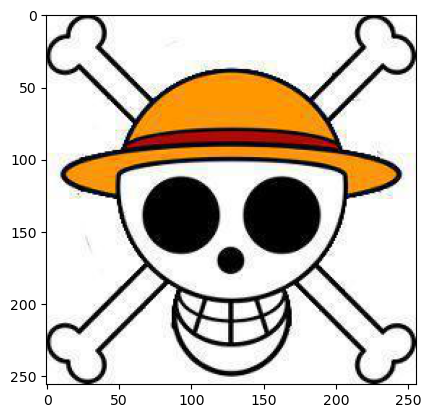

In [77]:
working_dir = "./images_parent/"
images_list = glob(working_dir + "images/*")

test_image = plt.imread(images_list[2])
print(type(test_image))
plt.imshow(test_image)

In [78]:
def apply_transforms(isAdditionalApplied=False):
    for image_name in images_list:
        base_name = os.path.basename(image_name) ## ADDITIONAL: Will the Filename matter? JPEG uses YUV coloring, PNG uses RGB...
        image = Image.open(image_name).convert("RGB")
        image = np.array(image)
        print(image.shape)

        image = A_transforms(image=image)
        image = image['image'] ## Albumentations likes to cast the array to 'dict', accessed by key 'image'
        image = image.astype(np.uint8)

        if(isAdditionalApplied): ## apply additional transforms to image to create "mod" folder
            image = iaa_transforms.augment_image(image=image) ## apply salt-pepper
            mod_save_path = r"./images_parent/images_mod/mod"
            imwrite(mod_save_path + base_name, image)

        else: ## apply transforms to normal image 
            normal_save_path = r"./images_parent/images/"
            imwrite(normal_save_path + base_name, image)

    print()

apply_transforms(False)
apply_transforms(True)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


length of noised images 8
length of normal images 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Length of noised numpy array 8
Length of normal numpy array 8


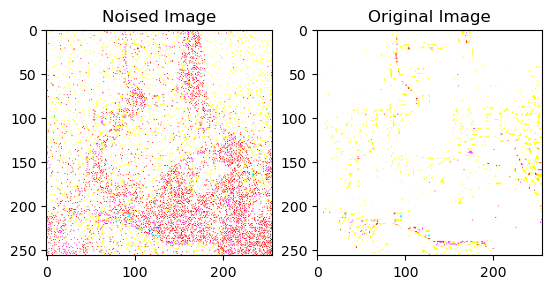

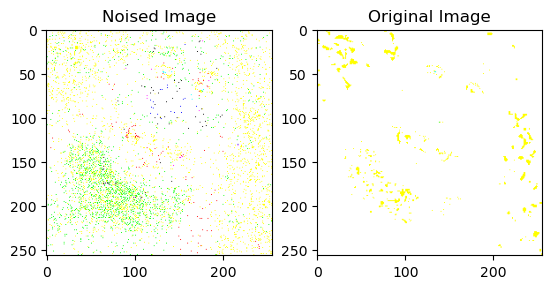

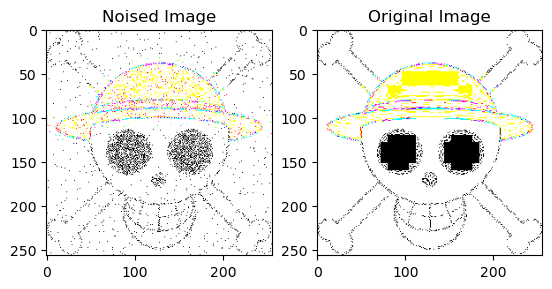

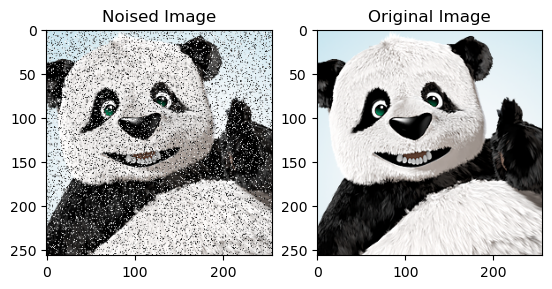

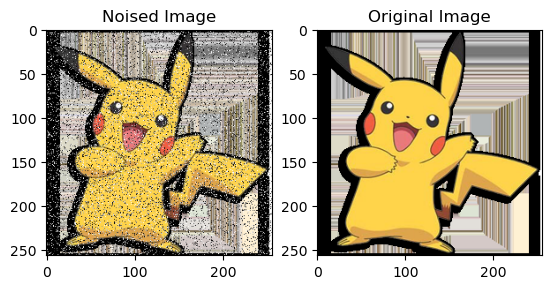

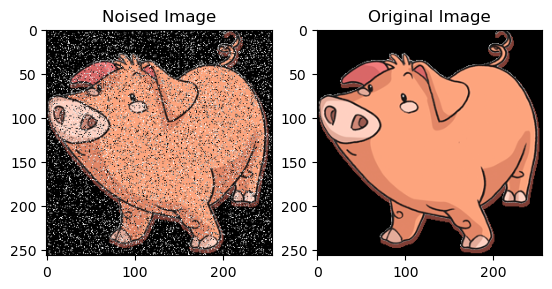

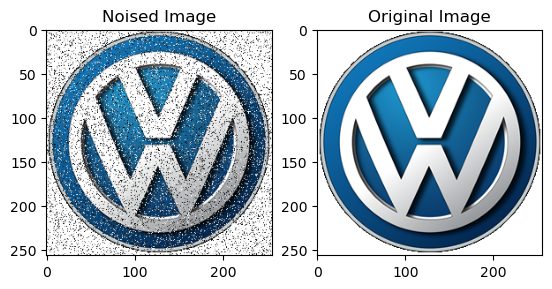

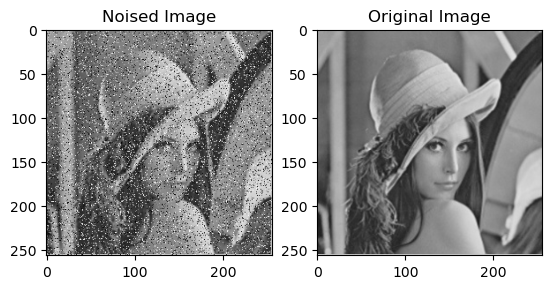

<Figure size 640x480 with 0 Axes>

In [85]:
noised_images = glob("./images_parent/images_mod/*")
normal_images = glob("./images_parent/images/*")

print(f"length of noised images {len(noised_images)}")
print(f"length of normal images {len(normal_images)}")

noised_images_input = []
normal_images_target = []

for i in range(min(len(noised_images), len(normal_images))):
    noised_image = plt.imread(noised_images[i]).astype(np.float32) ## numpy array
    normal_image = plt.imread(normal_images[i]).astype(np.float32) ## numpy array
    
    ## Saving images as numpy to list
    noised_images_input.append(noised_image)
    normal_images_target.append(normal_image)
    
    plt.subplot(1, 2, 1)
    plt.title("Noised Image")
    plt.imshow(noised_image)

    plt.subplot(1, 2, 2)
    plt.title("Original Image")
    plt.imshow(normal_image)
    
    plt.figure()
    
print(f"Length of noised numpy array {len(noised_images_input)}")
print(f"Length of normal numpy array {len(normal_images_target)}")

#print(type(noised_images_input[0][0][0][0])) ## UINT8 image saved as...

## Build Keras Dataset

In [86]:
BATCH_SIZE = 8

In [87]:
noise_ds = tf.data.Dataset.from_tensor_slices((noised_images_input, normal_images_target)).batch(BATCH_SIZE)
#print(next(iter(noise_ds))

In [88]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

test_image_batch, test_label_batch = noise_ds.get_single_element()


print(test_image_batch.shape)
print(test_label_batch.shape)

print(test_image_batch[3].shape)
print(test_label_batch[3].shape)

print(test_image_batch)

plt.imshow(test_image_batch[3])


(8, 256, 256, 3)
(8, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)
tf.Tensor(
[[[[1.3400000e+02 1.2000000e+02 4.9000000e+01]
   [1.6400000e+02 1.4700000e+02 7.8000000e+01]
   [1.6200000e+02 1.4400000e+02 8.2000000e+01]
   ...
   [1.7100000e+02 1.4600000e+02 5.3000000e+01]
   [1.6200000e+02 1.3700000e+02 4.5000000e+01]
   [1.6300000e+02 1.3600000e+02 4.5000000e+01]]

  [[2.4400000e+02 2.3000000e+02 1.5900000e+02]
   [1.4800000e+02 1.3100000e+02 6.2000000e+01]
   [1.7000000e+02 1.5200000e+02 8.8000000e+01]
   ...
   [2.5500000e+02 2.5500000e+02 1.6400000e+02]
   [1.8000000e+02 1.5300000e+02 6.4000000e+01]
   [1.6000000e+02 1.3300000e+02 4.4000000e+01]]

  [[1.4400000e+02 1.3000000e+02 5.9000000e+01]
   [1.5200000e+02 1.3500000e+02 6.6000000e+01]
   [1.4900000e+02 1.3100000e+02 6.7000000e+01]
   ...
   [1.6000000e+02 1.3400000e+02 4.7000000e+01]
   [1.7400000e+02 1.4600000e+02 6.2000000e+01]
   [1.7600000e+02 1.4800000e+02 6.4000000e+01]]

  ...

  [[1.8400000e+02 1.7500000e+02 1.7800000e+02]


## Build Model

In [161]:
from tensorflow.keras.models import Model
from tensorflow.keras import losses
from tensorflow.keras.layers import Rescaling, Input, Conv2D, MaxPool2D, UpSampling2D, Conv2DTranspose

In [163]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      Rescaling(1./255),
      Input(shape=(256, 256, 3)),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      MaxPool2D((2, 2), padding='same'),
      Conv2D(32, (3, 3), activation='relu', padding='same'),
      MaxPool2D((2, 2), padding='same'),
      Conv2D(16, (3, 3), activation='relu', padding='same'),
      MaxPool2D((2, 2), padding='same')
    ], name="Encoder")

    self.decoder = tf.keras.Sequential([
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(3, kernel_size=(3, 3), padding='same')
    ], name="Decoder")


  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [164]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredLogarithmicError())


In [165]:
%xmode Verbose
print(type(noise_ds))

autoencoder.fit(noise_ds, epochs=100) ## WHEN WRITING CUSTOM DATASETS, ALWAYS SPECIFY BATCHSIZE BEFOREHANDS

Exception reporting mode: Verbose
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 6.8739
Epoch 2/100
1/1 [==============================] - 1s 827ms/step - loss: 6.8483
Epoch 3/100
1/1 [==============================] - 1s 900ms/step - loss: 6.8035
Epoch 4/100
1/1 [==============================] - 1s 747ms/step - loss: 6.7344
Epoch 5/100
1/1 [==============================] - 1s 711ms/step - loss: 6.6301
Epoch 6/100
1/1 [==============================] - 1s 736ms/step - loss: 6.4793
Epoch 7/100
1/1 [==============================] - 1s 720ms/step - loss: 6.2702
Epoch 8/100
1/1 [==============================] - 1s 766ms/step - loss: 5.9910
Epoch 9/100
1/1 [==============================] - 1s 712ms/step - loss: 5.6328
Epoch 10/100
1/1 [==============================] - 1s 719ms/step - loss: 5.1896
Epoch 11/100
1/1 [==============================] - 1s 696ms/step - loss: 4.6706
Epoch 12/100
1/1 [=======

In [166]:
autoencoder.summary()

Model: "denoise_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 32, 32, 16)        24880     
                                                                 
 Decoder (Sequential)        (None, 256, 256, 3)       27187     
                                                                 
Total params: 52,067
Trainable params: 52,067
Non-trainable params: 0
_________________________________________________________________


## Some Testing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8, 256, 256, 3)
(8, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


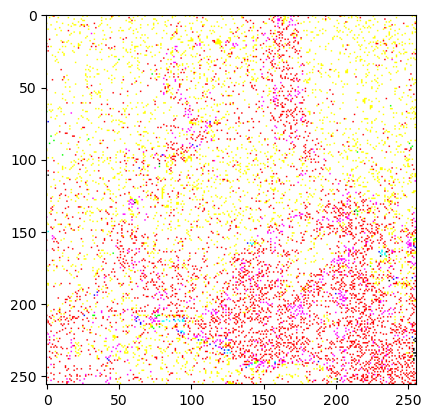

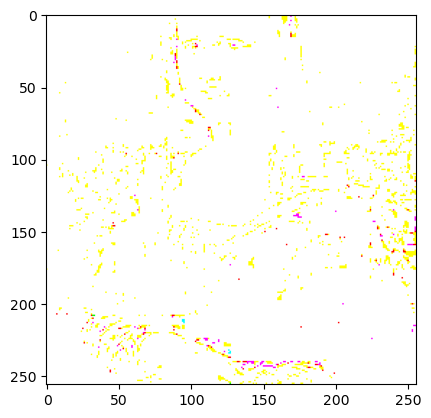

In [187]:
test_image_batch, test_label_batch = noise_ds.get_single_element()

print(test_image_batch.shape)
print(test_label_batch.shape)

print(test_image_batch[0].shape)
print(test_label_batch[0].shape)

plt.imshow(test_image_batch[0])
plt.figure()
plt.imshow(test_label_batch[0])

In [169]:

encoded_images = autoencoder.encoder().numpy()

ValueError: Exception encountered when calling layer "Encoder" (type Sequential).

Input 0 of layer "conv2d_91" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (256, 256, 3)

Call arguments received by layer "Encoder" (type Sequential):
  • inputs=tf.Tensor(shape=(256, 256, 3), dtype=uint8)
  • training=None
  • mask=None